In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
data_train = pd.read_csv("data/train_data.csv")
data_test = pd.read_csv("data/test_data.csv")
train = data_train.copy()
test = data_train.copy()

In [3]:
train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,12.247694,0.235294,0.5,0.0,0.033420,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.0,0.038795,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.0,0.046507,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.0,0.038561,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.0,0.060576,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


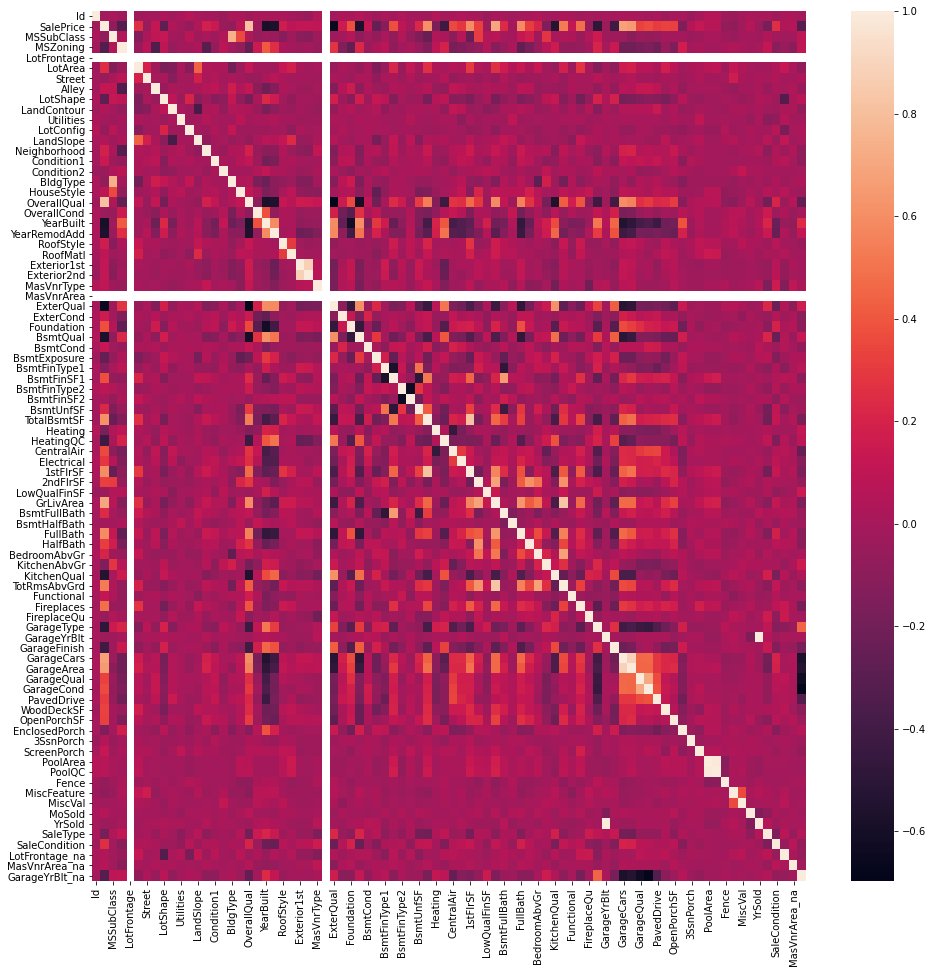

In [4]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr())
plt.show()

In [5]:
X = train.drop(['Id','SalePrice'],1)
y = train['SalePrice']

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=26)

In [15]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

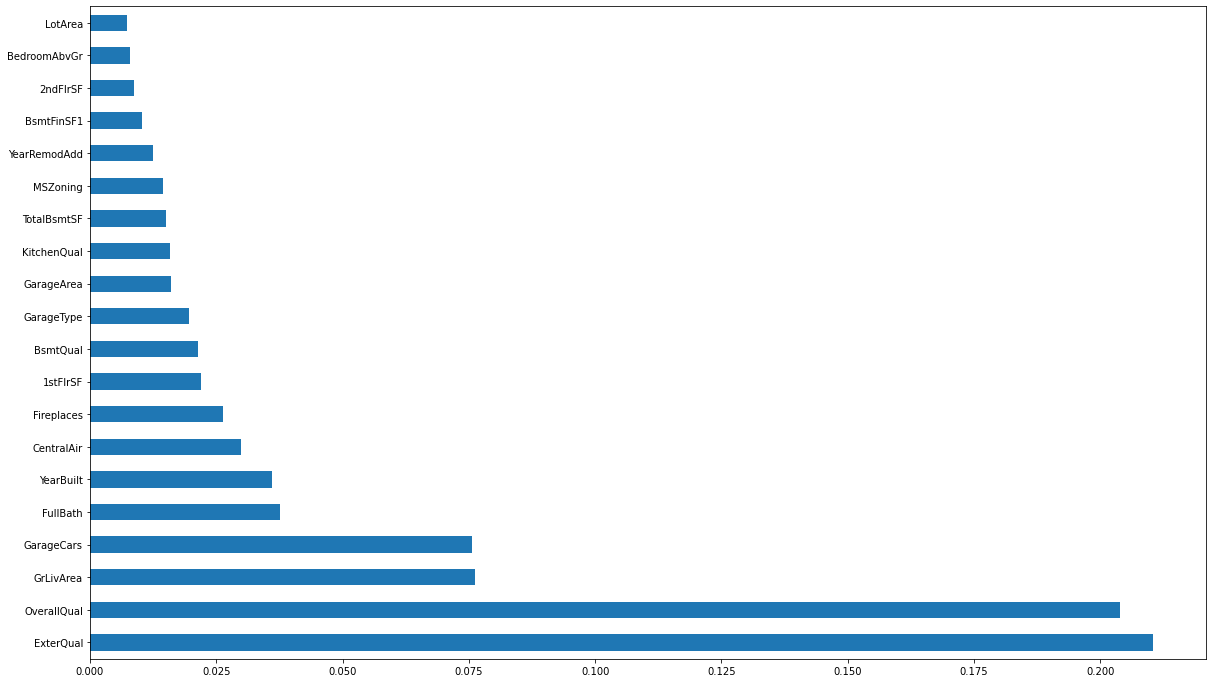

In [16]:
plt.figure(figsize=(20,12))
feat_importance = pd.Series(sel.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [17]:
feat_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=26))
feat_sel_model.fit(train_x,train_y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=26))

In [18]:
feat_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [19]:
selected_feat = train_x.columns[feat_sel_model.get_support()]

print(f"total features: {train_x.shape[1]}")
print(f"selected features: {len(selected_feat)}")
print(f"feat with coef == 0: {np.sum(feat_sel_model.estimator_.coef_ == 0)}")





total features: 82
selected features: 23
feat with coef == 0: 59


In [20]:
selected_feat

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive'],
      dtype='object')

In [21]:
train_x = train_x[selected_feat]

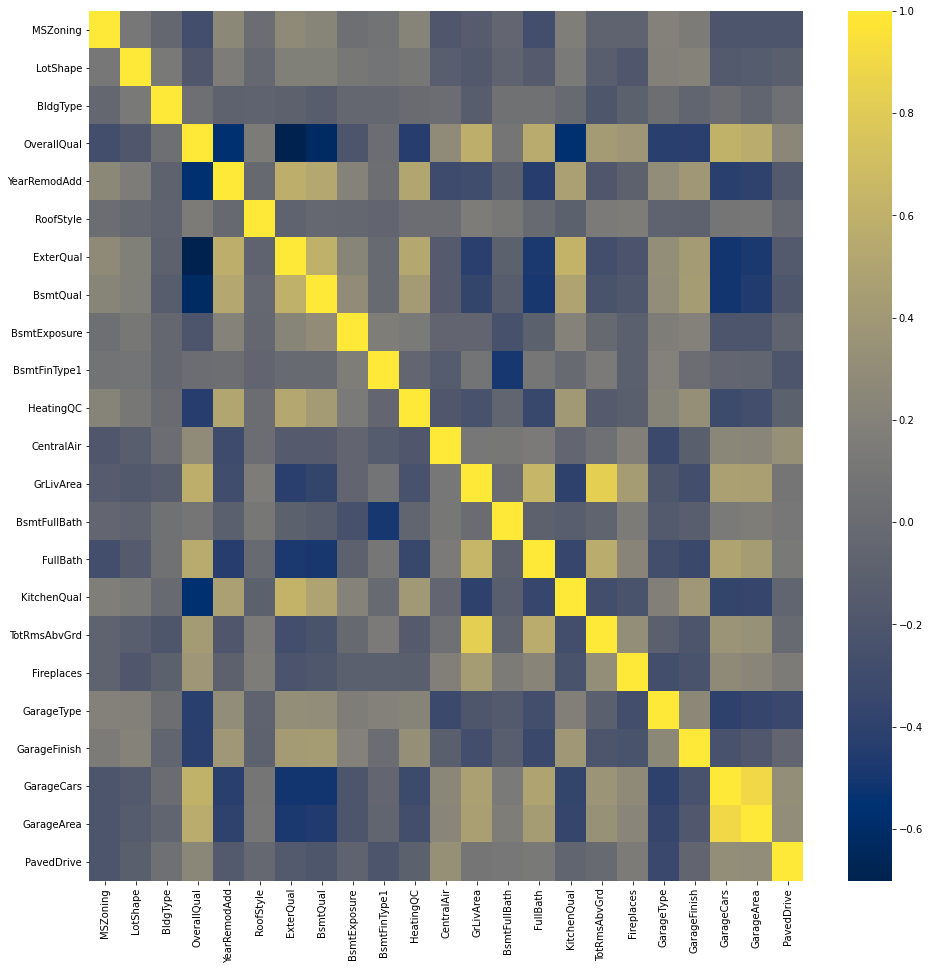

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(train_x.corr(),cmap="cividis")
plt.show()

In [23]:
train_x

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,RoofStyle,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,BsmtFullBath,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive
664,0.50,0.333333,0.00,0.777778,0.016393,0.0,0.333333,0.00,0.75,0.333333,...,0.333333,0.333333,0.000000,0.500000,0.333333,0.0,0.000000,0.75,0.799718,1.0
625,0.50,0.000000,0.00,0.555556,0.803279,0.5,1.000000,1.00,1.00,1.000000,...,0.000000,0.333333,1.000000,0.250000,0.000000,0.0,1.000000,0.50,0.310296,1.0
1122,0.50,0.000000,0.00,0.333333,0.885246,0.0,1.000000,1.00,1.00,1.000000,...,0.000000,0.333333,1.000000,0.250000,0.000000,0.2,1.000000,0.25,0.203103,1.0
861,0.50,1.000000,0.25,0.444444,0.754098,0.5,1.000000,1.00,0.75,0.166667,...,0.333333,0.333333,1.000000,0.333333,0.000000,0.0,1.000000,0.50,0.355430,1.0
478,0.50,1.000000,0.00,0.777778,0.032787,0.5,0.333333,0.00,0.25,0.333333,...,0.333333,0.666667,0.666667,0.416667,0.333333,0.0,0.666667,0.75,0.582511,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0.50,0.000000,0.00,0.444444,0.606557,0.0,1.000000,1.00,1.00,0.166667,...,0.000000,0.333333,1.000000,0.250000,0.000000,0.6,1.000000,0.25,0.197461,1.0
1126,0.50,1.000000,1.00,0.666667,0.049180,0.5,0.333333,0.50,1.00,1.000000,...,0.000000,0.666667,0.666667,0.416667,0.333333,0.0,0.000000,0.75,0.465444,1.0
1456,0.50,1.000000,0.00,0.555556,0.377049,0.0,1.000000,0.50,1.00,0.000000,...,0.333333,0.666667,1.000000,0.416667,0.666667,0.0,1.000000,0.50,0.352609,1.0
1342,0.50,1.000000,0.00,0.777778,0.098361,0.0,0.333333,0.50,1.00,1.000000,...,0.000000,0.666667,0.666667,0.416667,0.333333,0.0,0.666667,0.50,0.456276,1.0


In [24]:
train = train_x.copy()

In [25]:
train["SalePrice"] = y 
train

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,RoofStyle,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SalePrice
664,0.50,0.333333,0.00,0.777778,0.016393,0.0,0.333333,0.00,0.75,0.333333,...,0.333333,0.000000,0.500000,0.333333,0.0,0.000000,0.75,0.799718,1.0,12.955127
625,0.50,0.000000,0.00,0.555556,0.803279,0.5,1.000000,1.00,1.00,1.000000,...,0.333333,1.000000,0.250000,0.000000,0.0,1.000000,0.50,0.310296,1.0,11.982929
1122,0.50,0.000000,0.00,0.333333,0.885246,0.0,1.000000,1.00,1.00,1.000000,...,0.333333,1.000000,0.250000,0.000000,0.2,1.000000,0.25,0.203103,1.0,11.626254
861,0.50,1.000000,0.25,0.444444,0.754098,0.5,1.000000,1.00,0.75,0.166667,...,0.333333,1.000000,0.333333,0.000000,0.0,1.000000,0.50,0.355430,1.0,11.786762
478,0.50,1.000000,0.00,0.777778,0.032787,0.5,0.333333,0.00,0.25,0.333333,...,0.666667,0.666667,0.416667,0.333333,0.0,0.666667,0.75,0.582511,1.0,12.601487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0.50,0.000000,0.00,0.444444,0.606557,0.0,1.000000,1.00,1.00,0.166667,...,0.333333,1.000000,0.250000,0.000000,0.6,1.000000,0.25,0.197461,1.0,11.691072
1126,0.50,1.000000,1.00,0.666667,0.049180,0.5,0.333333,0.50,1.00,1.000000,...,0.666667,0.666667,0.416667,0.333333,0.0,0.000000,0.75,0.465444,1.0,12.066811
1456,0.50,1.000000,0.00,0.555556,0.377049,0.0,1.000000,0.50,1.00,0.000000,...,0.666667,1.000000,0.416667,0.666667,0.0,1.000000,0.50,0.352609,1.0,12.254863
1342,0.50,1.000000,0.00,0.777778,0.098361,0.0,0.333333,0.50,1.00,1.000000,...,0.666667,0.666667,0.416667,0.333333,0.0,0.666667,0.50,0.456276,1.0,12.339291


In [26]:
train.to_csv("data/train_data_fe.csv",index=False)

In [27]:
test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,12.247694,0.235294,0.5,0.0,0.033420,0.0,0.5,1.0,1.0,...,0.50,0.0,0.00000,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.0,0.038795,0.0,0.5,1.0,1.0,...,0.50,0.0,0.00000,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.0,0.046507,0.0,0.5,0.0,1.0,...,0.50,0.0,0.00000,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.0,0.038561,0.0,0.5,0.0,1.0,...,0.50,0.0,0.00000,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.0,0.060576,0.0,0.5,0.0,1.0,...,0.50,0.0,0.00000,1.000000,0.50,1.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,0.5,0.0,0.030929,0.0,0.5,1.0,1.0,...,0.50,0.0,0.00000,0.636364,0.25,1.0,0.5,0.0,0.0,0.0
1456,1457,12.254863,0.000000,0.5,0.0,0.055505,0.0,0.5,1.0,1.0,...,0.75,0.0,0.00000,0.090909,1.00,1.0,0.5,0.0,0.0,0.0
1457,1458,12.493130,0.294118,0.5,0.0,0.036187,0.0,0.5,1.0,1.0,...,0.00,1.0,0.16129,0.363636,1.00,1.0,0.5,0.0,0.0,0.0
1458,1459,11.864462,0.000000,0.5,0.0,0.039342,0.0,0.5,1.0,1.0,...,0.50,0.0,0.00000,0.272727,1.00,1.0,0.5,0.0,0.0,0.0


In [28]:
test_y = test["SalePrice"]

In [29]:
test = test[selected_feat]
test["SalePrice"] = test_y

<ipython-input-29-006324eaf6b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["SalePrice"] = test_y


In [30]:
test.to_csv("data/test_data_fe.csv",index=False)